# Tải thư viện

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('Data/LordsMobileVN_clean.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        200 non-null    int64  
 1   text                           194 non-null    object 
 2   post_text                      194 non-null    object 
 3   time                           200 non-null    object 
 4   image                          174 non-null    object 
 5   image_lowquality               200 non-null    object 
 6   images                         200 non-null    object 
 7   images_description             200 non-null    object 
 8   images_lowquality              200 non-null    object 
 9   images_lowquality_description  200 non-null    object 
 10  video                          22 non-null     object 
 11  video_duration_seconds         0 non-null      float64
 12  video_height                   0 non-null      flo

In [5]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [6]:
reactions

{'like': 54, 'love': 4, 'haha': 1, 'shares': 2, 'comments': 4}

## Đọc tất cả các post

In [7]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,752698296898984,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...
1,744907481011399,"🥹 Không có so sánh, không có đau thương"
2,745522664283214,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l..."
3,752111686957645,NaN
4,751732603662220,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...
...,...,...
195,688423049993176,Mời các nông dân vườn khoai trả lời ạ !
196,686334866868661,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ..."
197,687518510083630,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...
198,687500140085467,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...


## Phân tích Reactions

In [8]:
raw_df.head(5)

,post_id,text,post_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,...,reaction_count,with,page_id,sharers,image_id,image_ids,video_ids,videos,was_live,fetched_time
0,752698296898984,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,2023-11-14 16:29:00,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,"['May be an image of 1 person, crowd and text'...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,"['May be an image of 1 person, crowd and text'...",...,59,NaN,500144493505633,NaN,NaN,[],[],[],False,2023-11-14 17:52:53.745311
1,744907481011399,"🥹 Không có so sánh, không có đau thương","🥹 Không có so sánh, không có đau thương",2023-11-14 08:00:00,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""May be an image of 3 people and text that sa...",['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,"[""May be an image of 3 people and text that sa...",...,122,NaN,500144493505633,NaN,7.449073e+14,['744907321011415'],NaN,NaN,False,2023-11-14 17:52:56.662414
2,745522664283214,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...","Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",2023-11-13 16:00:00,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,[],[],['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,['May be an image of text'],...,165,NaN,500144493505633,NaN,7.455224e+14,['745522350949912'],NaN,NaN,False,2023-11-14 17:52:59.287292
3,752111686957645,NaN,NaN,2023-11-13 10:23:14,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,['May be an image of text'],['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,['May be an image of text'],...,99,NaN,500144493505633,NaN,7.521117e+14,['752111686957645'],NaN,NaN,False,2023-11-14 17:53:05.409723
4,751732603662220,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,2023-11-13 10:00:03,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,['May be an image of 1 person and text'],...,98,NaN,500144493505633,NaN,7.517324e+14,['751732393662241'],NaN,NaN,False,2023-11-14 17:53:09.098999


# Phân tích sự phát triển lượt react theo ngày

In [9]:
post_df_1=raw_df
post_df_1[['post_id', 'reactions']]

,post_id,reactions
0,752698296898984,"{'like': 54, 'love': 4, 'haha': 1}"
1,744907481011399,"{'like': 97, 'haha': 25}"
2,745522664283214,"{'like': 130, 'love': 3, 'haha': 30, 'wow': 1,..."
3,752111686957645,"{'like': 91, 'love': 2, 'haha': 6}"
4,751732603662220,"{'like': 96, 'love': 2}"
...,...,...
195,688423049993176,"{'like': 183, 'love': 2, 'haha': 44, 'wow': 2,..."
196,686334866868661,"{'like': 96, 'love': 3, 'haha': 27, 'care': 1}"
197,687518510083630,"{'like': 176, 'love': 3, 'haha': 164, 'wow': 2..."
198,687500140085467,"{'like': 132, 'love': 7, 'haha': 1}"


In [10]:
post_df_2=raw_df[['time' ,'reaction_count']]
post_df_2

,time,reaction_count
0,2023-11-14 16:29:00,59
1,2023-11-14 08:00:00,122
2,2023-11-13 16:00:00,165
3,2023-11-13 10:23:14,99
4,2023-11-13 10:00:03,98
...,...,...
195,2023-08-04 11:14:35,234
196,2023-08-04 08:00:01,127
197,2023-08-03 16:00:02,350
198,2023-08-03 08:00:01,140


In [11]:
post_df_2['time'] = pd.to_datetime(post_df_2['time'])
dates=post_df_2['time'].to_list()
y=post_df_2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

200 200
[Timestamp('2023-08-02 08:00:02'), Timestamp('2023-08-03 08:00:01'), Timestamp('2023-08-03 16:00:02'), Timestamp('2023-08-04 08:00:01'), Timestamp('2023-08-04 11:14:35'), Timestamp('2023-08-04 14:27:42'), Timestamp('2023-08-04 16:39:04'), Timestamp('2023-08-05 08:00:03'), Timestamp('2023-08-06 22:35:25'), Timestamp('2023-08-07 08:00:42'), Timestamp('2023-08-07 13:00:04'), Timestamp('2023-08-07 17:46:52'), Timestamp('2023-08-08 08:00:02'), Timestamp('2023-08-09 08:00:02'), Timestamp('2023-08-09 13:21:03'), Timestamp('2023-08-10 10:27:12'), Timestamp('2023-08-10 12:30:00'), Timestamp('2023-08-11 10:00:00'), Timestamp('2023-08-11 12:01:06'), Timestamp('2023-08-11 15:00:01'), Timestamp('2023-08-12 08:00:00'), Timestamp('2023-08-13 08:00:00'), Timestamp('2023-08-14 08:00:00'), Timestamp('2023-08-14 14:47:00'), Timestamp('2023-08-14 15:23:00'), Timestamp('2023-08-15 09:30:00'), Timestamp('2023-08-15 12:53:00'), Timestamp('2023-08-16 10:02:00'), Timestamp('2023-08-16 12:23:00'), Times

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_24884\2221346998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_2['time'] = pd.to_datetime(post_df_2['time'])


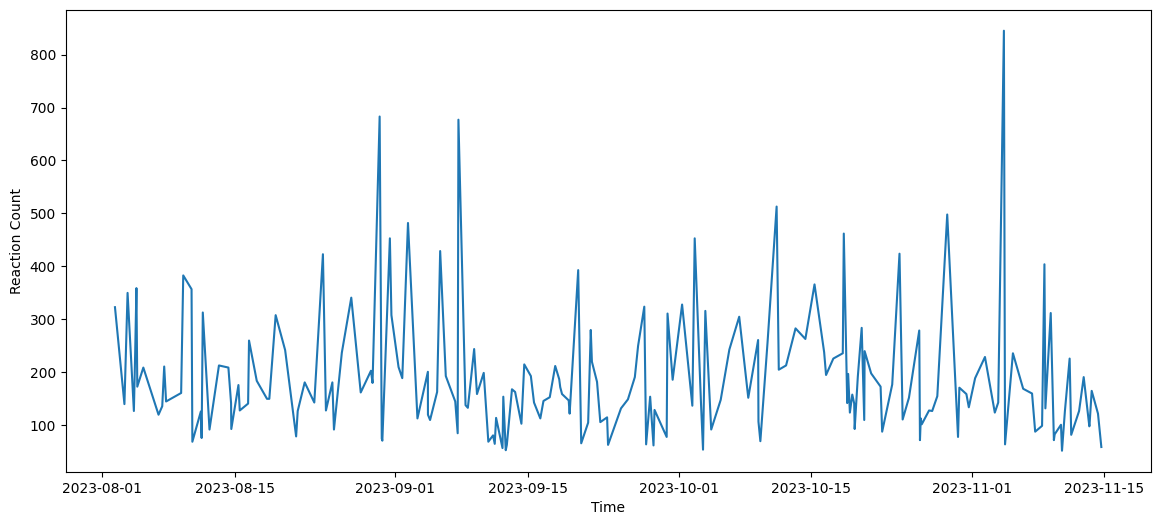

In [12]:
# biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ xa ngày hiện tại đến hiện tại
plt.figure(figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.plot(dates,y)
plt.show()

# Phân tích từng loại lượt reaction theo ngày

In [13]:
post_df_1['reactions'] = post_df_1['reactions'].apply(lambda x : dict(eval(x)) )
df_reactions = post_df_1['reactions'].apply(pd.Series )

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_24884\4037589999.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_reactions = post_df_1['reactions'].apply(pd.Series )


In [14]:
# gộp các cột lại vào dataframe
df_reactions = df_reactions.fillna(0)
post_df_1 = post_df_1.fillna(' ')
post_df_with_reactions = pd.concat([post_df_1, df_reactions], axis=1).drop('reactions', axis=1)
post_df_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...
195,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


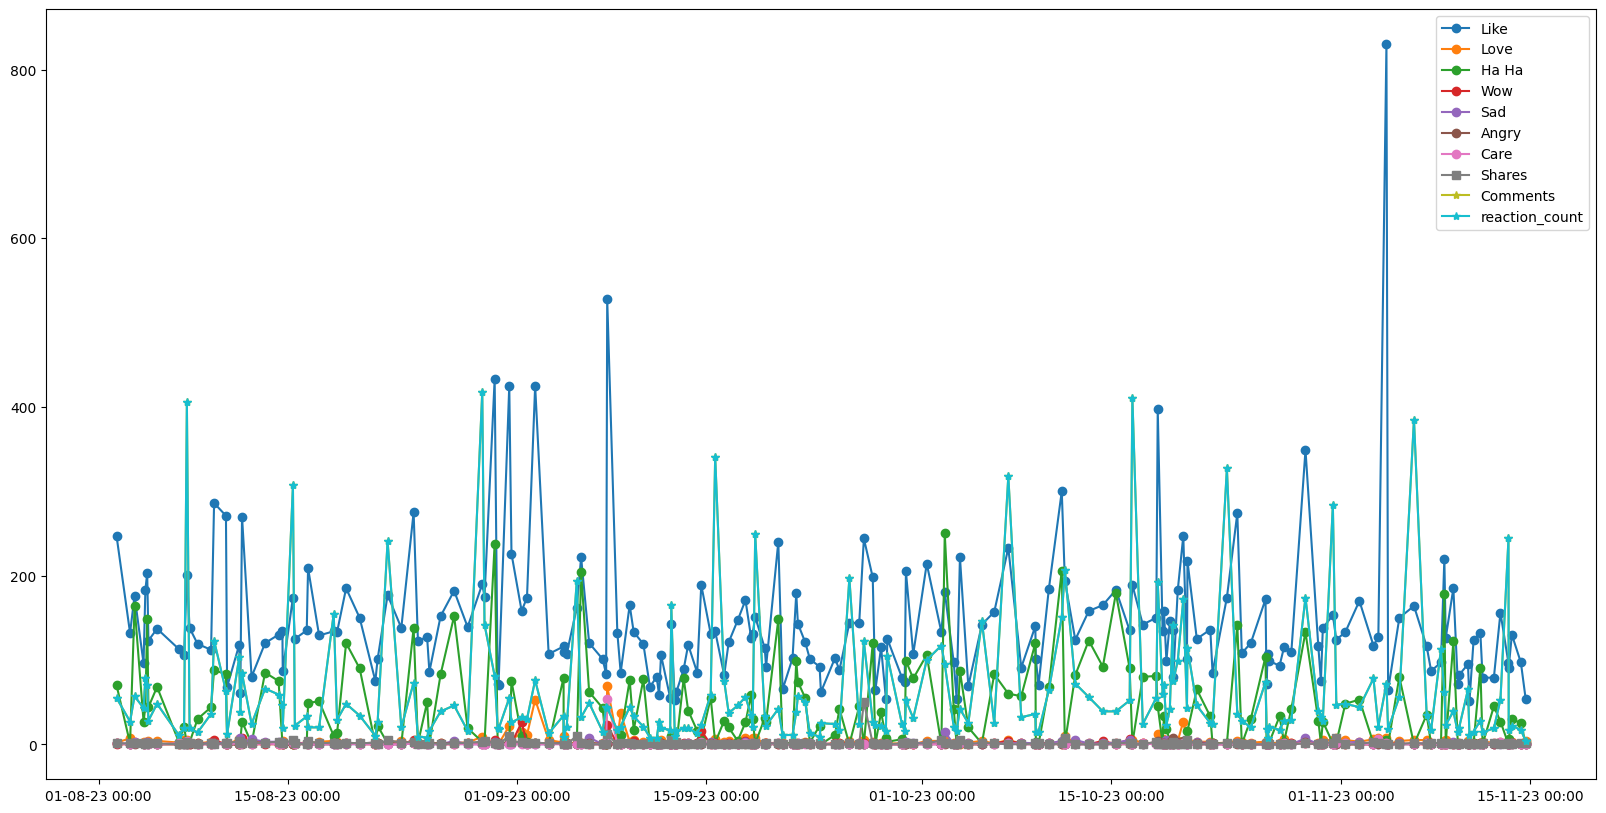

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
post_df_with_reactions['time'] = pd.to_datetime(post_df_with_reactions['time'])
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [16]:
df_reactions

,like,love,haha,wow,sad,care,angry
0,54.0,4.0,1.0,0.0,0.0,0.0,0.0
1,97.0,0.0,25.0,0.0,0.0,0.0,0.0
2,130.0,3.0,30.0,1.0,1.0,0.0,0.0
3,91.0,2.0,6.0,0.0,0.0,0.0,0.0
4,96.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
195,183.0,2.0,44.0,2.0,2.0,0.0,1.0
196,96.0,3.0,27.0,0.0,0.0,1.0,0.0
197,176.0,3.0,164.0,2.0,3.0,2.0,0.0
198,132.0,7.0,1.0,0.0,0.0,0.0,0.0


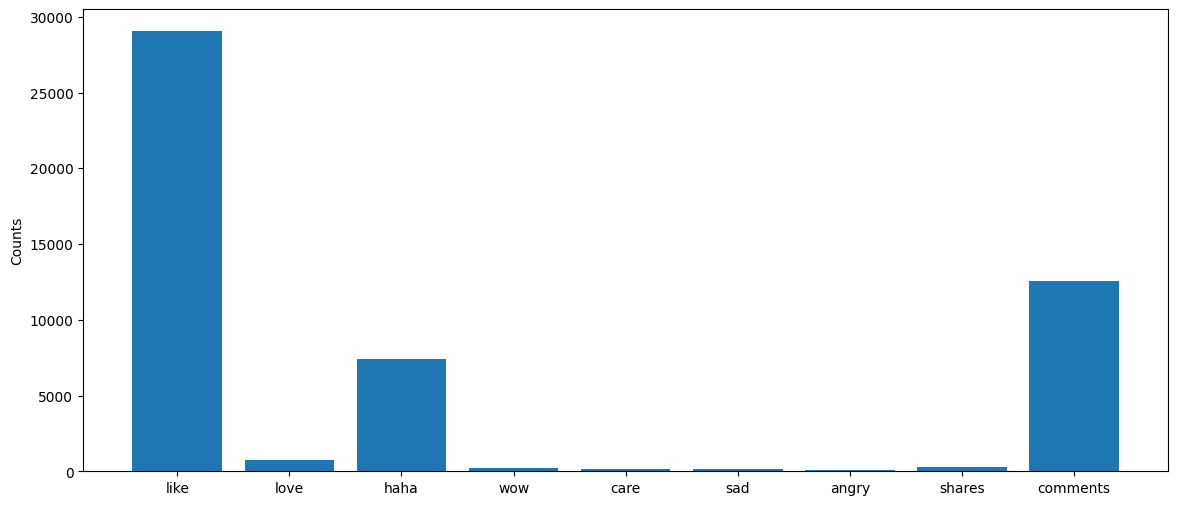

In [17]:
total_reactions = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [18]:
df_reactions['total residual emotions'] = df_reactions['care'] + df_reactions['sad'] + df_reactions['angry'] +df_reactions['wow']


In [19]:
total_reactions = df_reactions[['like', 'love', 'haha', 'total residual emotions']].sum()

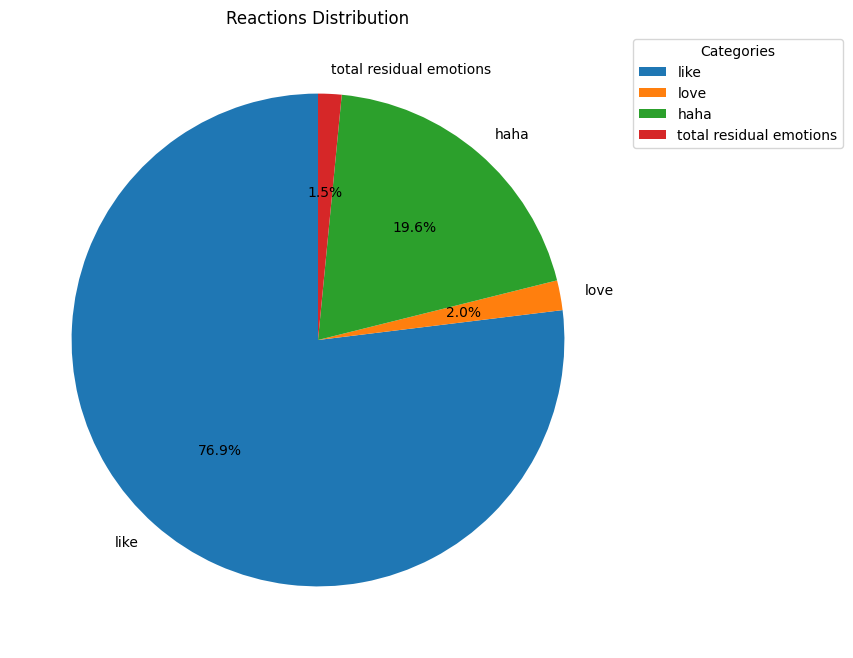

In [20]:
plt.figure(figsize=(8, 8))

plt.pie(total_reactions.values, labels=total_reactions.index, autopct='%1.1f%%', startangle=90)
plt.title('Reactions Distribution')

plt.legend(title="Categories", bbox_to_anchor=(1, 1))
plt.show()

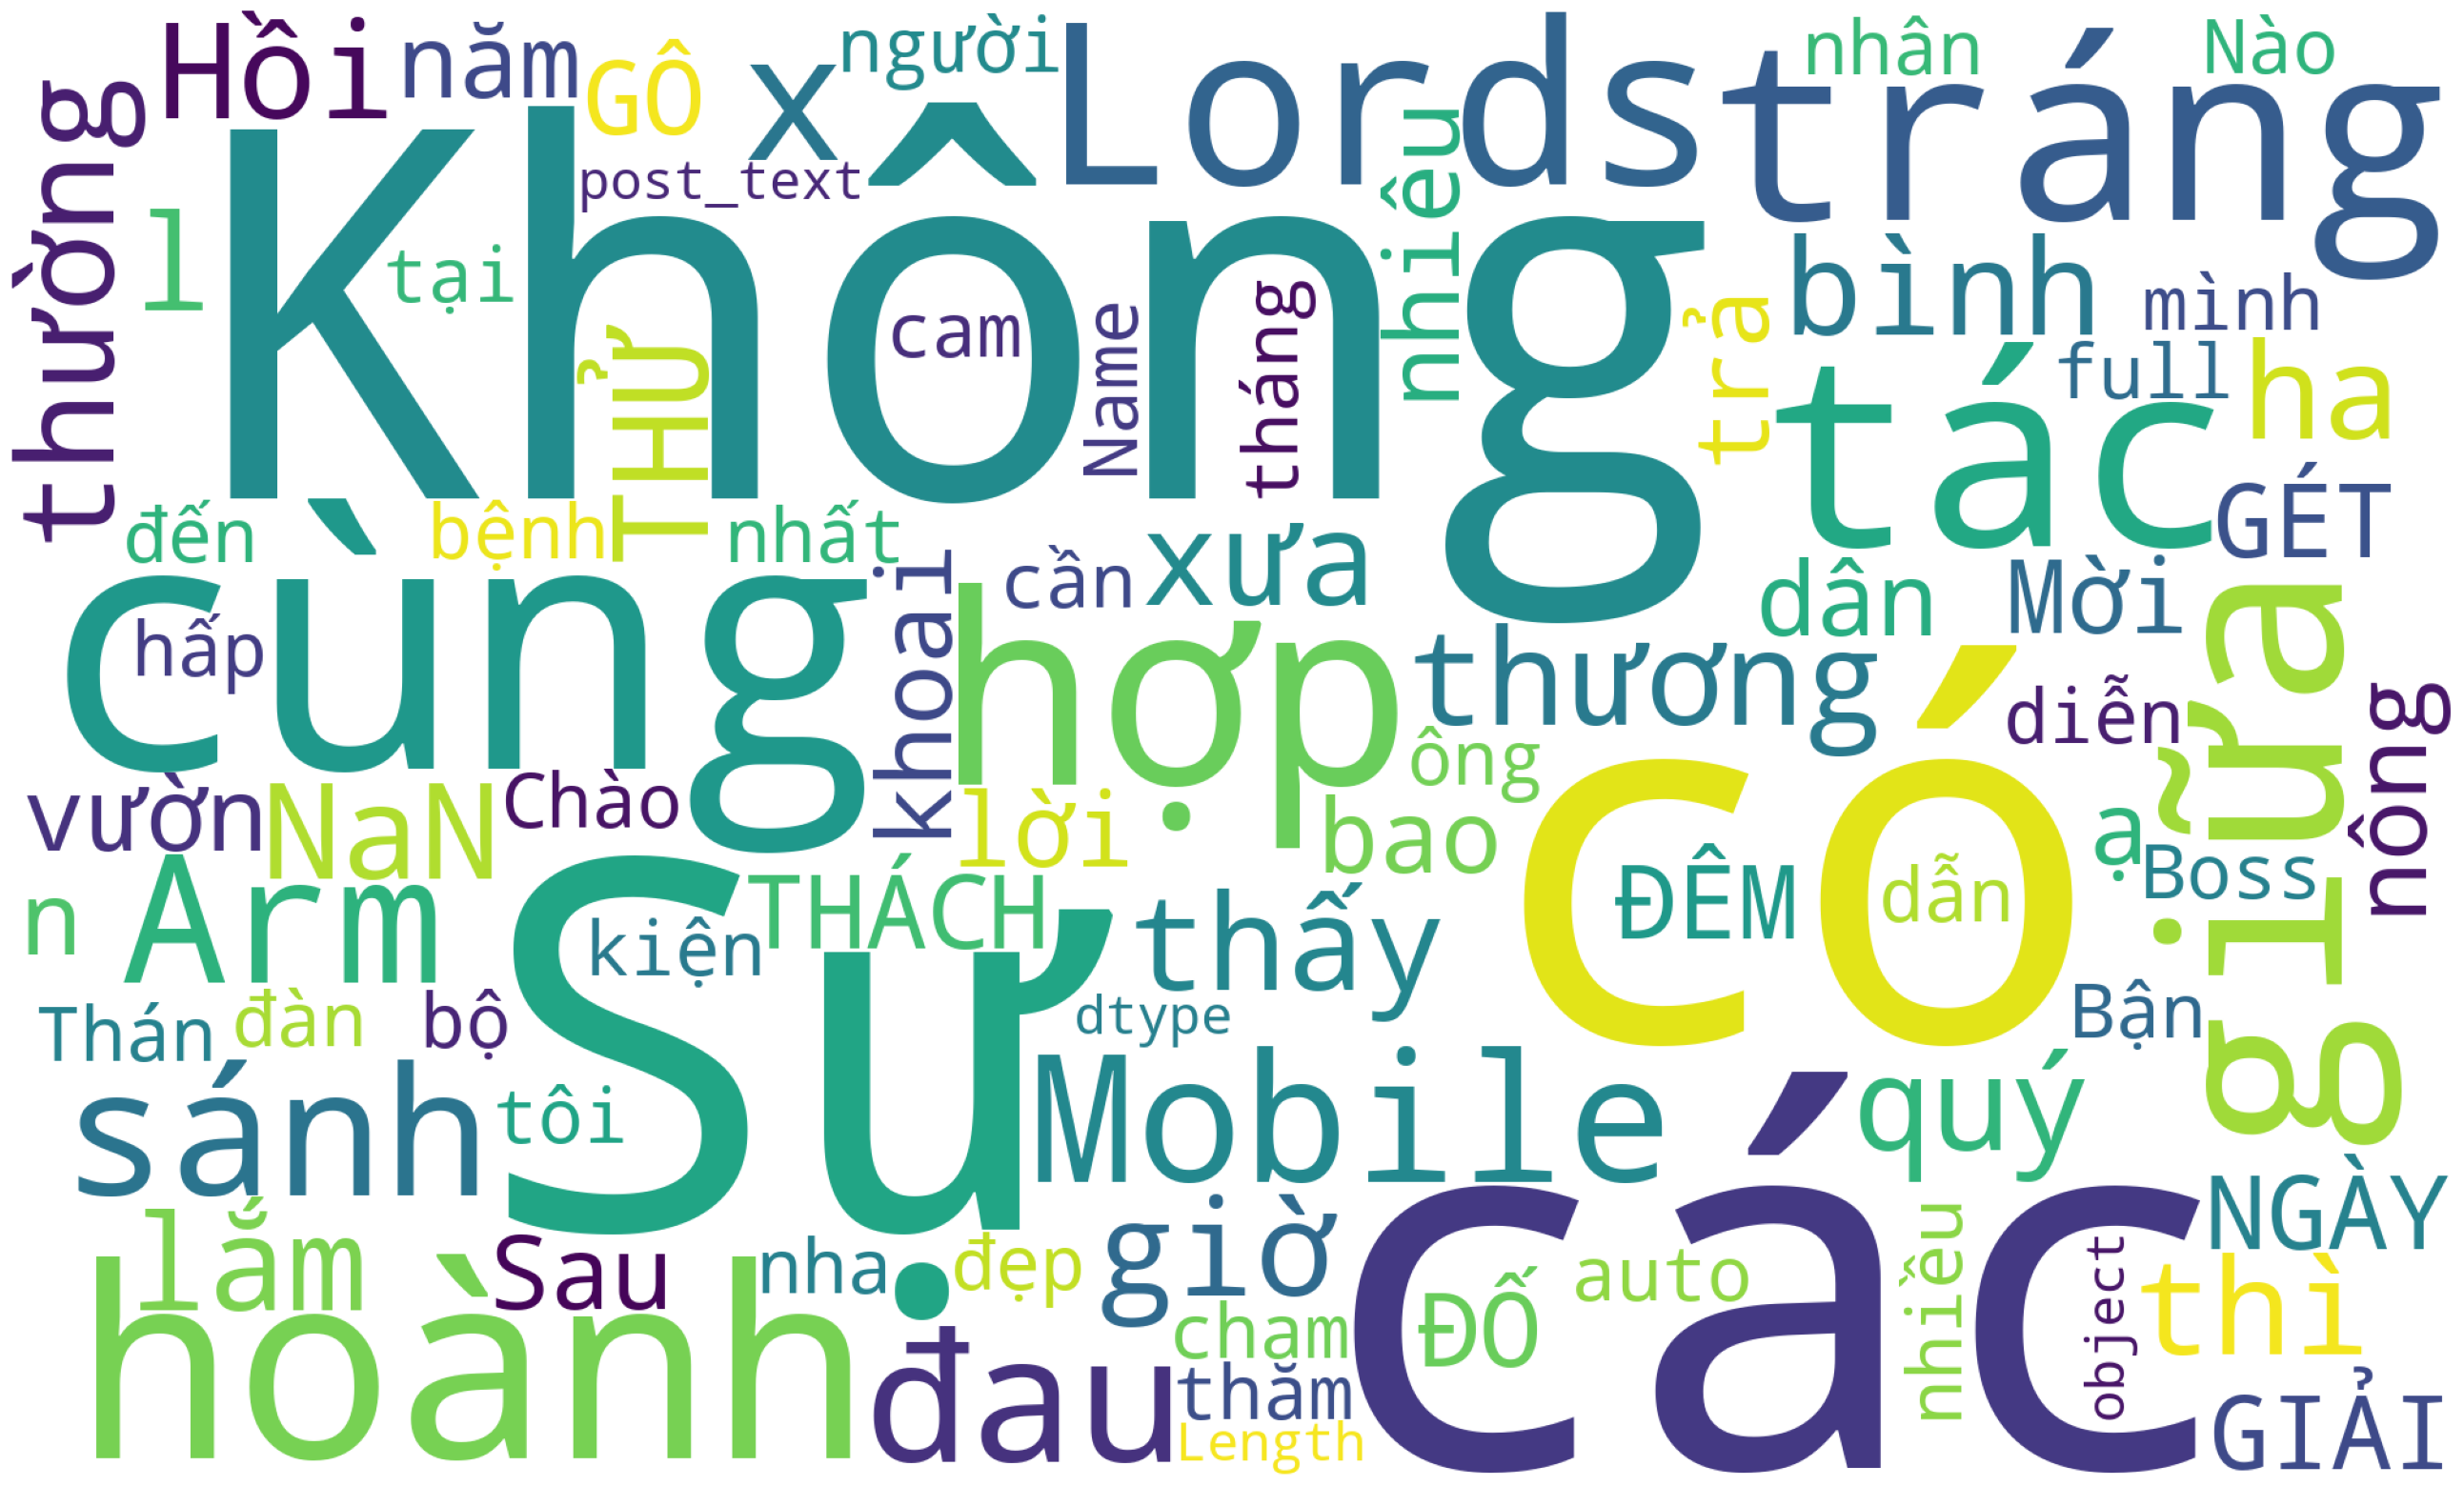

In [21]:
# những từ được dùng nhiều nhất
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()